
________________
<h1 align="center"><font color = darkblue>Airbnb Price Category Prediction  </font></h1>

_________________

## **Problem Defination:**

The problem statement of this project is to predict the pricing range (beginner, plus, premium) of Airbnb listings in Montreal based on their attributes and descriptions. The dataset contains listings of different areas in Montreal during 2019. It comes with rich information for each listing, including a link to the thumbnails etc. The goal is to develop a multi-objective and multi-modal that combines text and image inputs to improve the accuracy of the classification. The project follows the data science life-cycle for tuning, including trying different features, hyperparameters, and modeling techniques to improve the model's performance on the public leaderboard.

---

## **Input:**

The input for the model is a combination of text and image data. The text input includes the description of the Airbnb listing, while the image input includes images of the listing.The dataset contains listings of different areas in Montreal during 2019. It comes with rich information for each listing, including a link to the thumbnails etc. These inputs are used to predict the pricing range of the listing as `beginner`, `plus`, or `premium`.

---

## **Output:**

The output of the model is a predicted pricing range category for each Airbnb listing in Montreal. The pricing range categories are `beginner`, `plus`, or `premium`, which are denoted by the labels 0, 1, and 2 respectively. The model is trained to classify each listing into one of these categories based on its input features such as description, images, location, amenities, and host information. The output of the model is a classification label denoting the predicted pricing range category for the listing.

---



## **Required Data Mining Function:**


### **Feature engineering:**
- **Extracting features from text data**: using TF-IDF.
- **Extracting features from image data**: using convolutional neural networks.

#### **Model selection and training:**

- **Convolutional Neural Network** (CNN) with image inputs.
- **Multi-Modal Deep Learning Model** that utilizes both CNN and LSTM layers to process text and image inputs.

#### **Evaluations:**

- **Calculating accuracy**: percentage of correctly classified instances.
- **Calculating precision**: percentage of true positives out of all positive predictions.
- **Calculating recall**: percentage of true positives out of all actual positives.
- **Calculating F1 score**: harmonic mean of precision and recall.

---



## **Challenges**

- **Ensuring data quality**, dealing with missing data, outliers, and ensuring representative data.

- **Diffrent languages**: the text column contains text different languageColumns (or Features) that contain text with different language.

- **Images size**: Dealing with images in diffrent sizesDealing with images in diffrent sizes.

- **Multi-modality**, combining different types of inputs in a single model.

- **Overfitting**, preventing the model from fitting noise in the training data.

- **Model complexity**, selecting the appropriate architecture and hyperparameters.

- **Interpretability**, understanding the model's predictions and important features.


Addressing these challenges requires careful consideration of the data, model architecture, and hyperparameters, as well as the use of appropriate evaluation metrics and techniques for model interpretation and explanation.

---



## **Impact**


Building a machine learning model for predicting the pricing range category of Airbnb listings in Montreal can have several impacts, including:

- **Improved user experience**: By providing accurate pricing recommendations to new hosts, the model can help ensure that guests are getting fair and competitive prices for their Airbnb stays. This can lead to improved user satisfaction and repeat business.

- **Increased revenue for hosts**: By recommending pricing ranges that are appropriate for the listing, hosts can avoid underpricing their listings and missing out on potential revenue. This can help hosts maximize their earnings from their Airbnb listings.

- **Improved market insights**: By analyzing the features and attributes of successful listings, the model can provide insights into what makes a successful Airbnb listing in Montreal. This information can be valuable for the tourism industry and other stakeholders.

- **Increased efficiency**: By automating the pricing recommendation process, the model can save hosts time and effort in setting prices for their listings. This can lead to increased efficiency and productivity for hosts.

- **Improved pricing**: By leveraging machine learning algorithms, the model can provide more accurate pricing recommendations than traditional manual methods. This can lead to improved pricing and more competitive listings.

Overall, the impact of building a machine learning model for predicting the pricing range category of Airbnb listings in Montreal can be significant, benefiting hosts, guests, and the tourism industry as a whole.

---



## **Ideal Solution:**

- Best accuracy in leaderboard is 0.62934. It is produced by LSTM and CNN (model3) without using transfer learning.
- I traied RGB images but it doesn't improve the accuracy.
- I traied 'sgd' optimizer with the simple model (model1), but the accuracy decresed on leaderboard sharply (0.4682)
- Simple RNN didn't produce bad performance.

---


---

<a id = 0></a>
<h1 align="center"><font color = Purple>SETUP</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

---

In [ ]:
import os
import datetime
from time import time
from pprint import pprint
from tqdm import tqdm

import numpy as np
import pandas as pd

#################################### For Images ####################################
from PIL import Image
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import tensorflow as tf
import matplotlib as mt
import matplotlib.pyplot as plt
%matplotlib inline
#################################### Scikit-learn ####################################

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,precision_score,recall_score,f1_score,precision_recall_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.decomposition import PCA

In [ ]:
from tensorflow import keras
import tensorboard

from keras.layers import Dense, Input, Flatten, BatchNormalization,GRU,SimpleRNN
from keras.layers import Conv2D, MaxPooling2D, Dropout, Activation,Concatenate
from keras.layers import Bidirectional,Embedding,Bidirectional,LSTM,Reshape
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam,SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [ ]:
# some seeting for pandas and hvplot

pd.options.display.max_columns = 100
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100
np.set_printoptions(threshold=2000)

In [ ]:
plt.style.use('fivethirtyeight')

font = {'family' : 'Georgia',
        'weight' : 'normal',
        'size'   : 14}
mt.rc('font', **font)

---
<a id = 1></a>
<h1 align="center"><font color = Purple>1. Load and Check Data</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

---

In [ ]:
data = pd.read_csv('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/train_xy.csv')
data.head()

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in the heart of Montreal. This 3 bedroom centrally loc...",img_train/0.jpg,Apartment,1
1,"Located in one of the most vibrant and accessible locations of downtown Montreal, this one bedro...",img_train/1.jpg,Apartment,0
2,"Logement coquet et douillet à 10 minutes du centre-ville de Montréal. Épicerie, pharmacie, saq, ...",img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) condo (on the 1th floor) in the West-Island of Mon...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très agréable a vivre à louer dans un quartier sympa de M...,img_train/4.jpg,Apartment,0


### **Visualize some images**

In [ ]:
# Get a list of all the image file paths in the folder
trn_image_dir='/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/img_train'
train_image_paths = [os.path.join(trn_image_dir, file_path) for file_path in os.listdir(trn_image_dir) if file_path.endswith(".jpg")]
train_image_paths[:3]

['/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/img_train/6234.jpg',
 '/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/img_train/1269.jpg',
 '/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/img_train/3863.jpg']

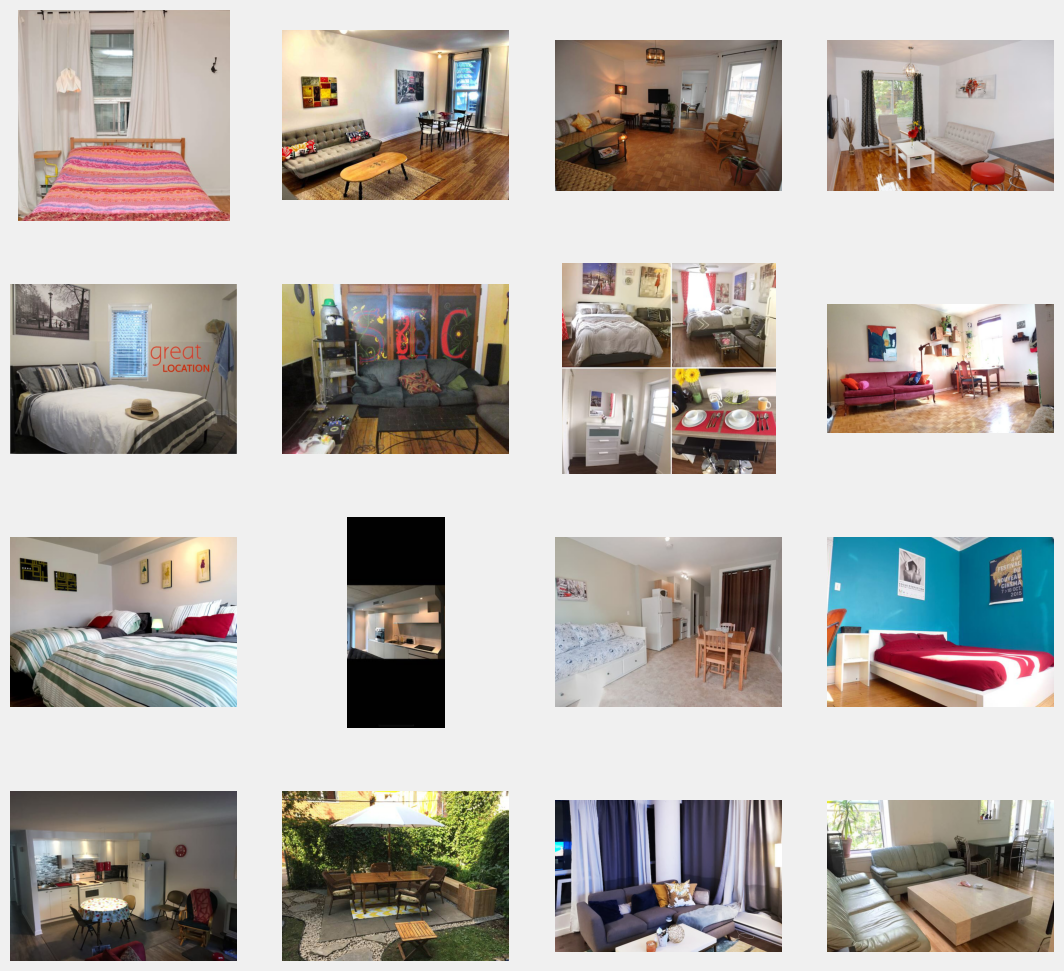

In [ ]:
import random
# Randomly select 5 images from the list
random_images = random.sample(train_image_paths, 16)
# Initialize a figure with 5 subplots
fig, axs = plt.subplots(4, 4, figsize=(12, 12))

# Display the selected images
for i, image_path in enumerate(random_images):
    image = Image.open(image_path)
    axs[i//4, i%4].imshow(image)
    axs[i//4, i%4].axis("off")
plt.show()

> **OBSERVATION:** Images sizes are not equal.

---
<a id = 1></a>
<h1 align="center"><font color = Purple>2. Data Preprocessing</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

---

#### For Text Dataset:
- **Check missing values.**
- **Translate text to English.**
- **Convert datatypes of target columns.**
- **Parsing and tokenization**: Splitting the raw text into tokens (words) using NLTK
- **Removing stopwords**: Filtering out common words such as "the", "a", "to" etc. that do not add much meaning. This improves the feature quality.
- **Lemmatization:** Finding the canonical form of a word based on its meaning

#### For Images Dataset:

- Check Invalid Format Images.
- Resize Images.
- Image Normalization.
- Feature extraxtion using CNN



## **2.1 Preprocessing for Text Dataset**

I will try two vwesion of text data:

    1. Data with translation to English
    2. Data without translation
### **Check Missing values in the text dataset**:
We then check for missing values in the DataFrame using the `isna()` function and compute the sum of missing values for each column using the `sum()` function. Finally, we print the number of missing values for each column using `print(missing_values)`.

In [ ]:
# Check for missing values in the DataFrame
missing_values = data.isna().sum()

# Print the number of missing values for each column
print(f"Number of missing values: {missing_values}")
print(f"\n\nPercentage of missing values: {round(missing_values/data.shape[0],2)*100}")

Number of missing values: summary    301
image        0
type         0
price        0
dtype: int64


Percentage of missing values: summary    4.0
image      0.0
type       0.0
price      0.0
dtype: float64


In [ ]:
# Find the missing values in the DataFrame
missing_values = data[data.isna().any(axis=1)]
missing_values.head()

,summary,image,type,price
19,NaN,img_train/19.jpg,House,0
21,NaN,img_train/21.jpg,Apartment,1
29,NaN,img_train/29.jpg,Apartment,1
34,NaN,img_train/34.jpg,Apartment,0
66,NaN,img_train/66.jpg,Condominium,1


> **OBSERVATION:** 4% of text data in summery column are missed, I will drop them.

In [ ]:
print('Shape of the data before dropping the missing',data.shape)
data = data.dropna()
print('Shape of the data after dropping the missing',data.shape)

Shape of the data before dropping the missing (7627, 4)
Shape of the data after dropping the missing (7326, 4)


### **Convert Data types**


In [ ]:
data.dtypes

summary    object
image      object
type       object
price       int64
dtype: object

In [ ]:
# get the total number of unique outputs (later used for prediction)
data['price'] = data['price'].astype('category').cat.codes
data['type'] = data['type'].astype('category').cat.codes
len_price = len(data['price'].unique())
len_type = len(data['type'].unique())

print(f'Number of Price Categories: {len_price}')
print(f'Number of Type Categories: {len_type}')

Number of Price Categories: 3
Number of Type Categories: 24


### **Encoding Classes**

In [ ]:
# Create a label encoder for each categorical feature
encoder = LabelEncoder()
encoder.fit(data['type'])

# Use the label encoders to transform the categorical features in the training data
data['type'] = encoder.transform(data['type'])

In [ ]:
print(data['price'].unique())
print()
print(data['type'].unique())

[1 0 2]

[ 1 17 22 10 18 20  8  4 23  2  5 13 15 16 14 11 19  0 21  3  6 12  7  9]


### **Translate Text Column**

In [ ]:
# install transtaltion libarary
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=8d6a8a7fb2bdde7daa3757c4713f464b8c96c2f6aabf9e1d4884514f76b77b6f
  Stored in directory: /root/.cache/pip/wheels/61/f7/ef/4d5c03c448eb8583bc063caca7e8802d8801af40c65e9b8022
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h

In [ ]:
data['summary'][187]

"Beautiful corner unit, open concept Condo with balcony over looking Montreal's south west borough. Located steps to Ste Catherine Street and all its shopping."

In [ ]:
%%time
# translate the different language in summary
from googletrans import Translator

translator = Translator()
data['translated_summary'] = [translator.translate(x, dest='en')\
                               .text for x in data['summary']]

CPU times: user 46.9 s, sys: 4.84 s, total: 51.8 s
Wall time: 6min 59s


> **OBSERVATION:** Time intensive process.

In [ ]:
data['translated_summary'][187]

'This house is located in an independent city villa. There are three independent bedrooms, one big bedroom and two guest bedrooms, all of which are double beds. The big bedroom is a double bed, and there is a single folding bed. The house contains a large bedroom The kitchen, restaurant, living room and office area (Website hidden by Airbnb) have convenient transportation. It takes only 10 minutes to drive to the airport and 20 minutes to the city center. Buses can reach multiple subway stations, train stations and the airport. Surrounded by supermarkets, convenience stores, Pizzerias, parks, drugstores, riversides and hospitals.'

### **Tokenization and converting to integer IDs**

1. Tokenization using `Tokenizer`
2. Padding using `pad_sequences`: The padding is done using a padding value, here 'post' which means padding will be added at the end of the sequence.

In [ ]:
x_train_text =  data['summary'].astype('str')
x_train_text_trans =  data['translated_summary'].astype('str')
y_train_price=  data['price']
y_train_type =  data['type']

In [ ]:
# preprocess text data

vocab_size = 40000   #the maximum size of the vocabulary
max_len = 100        #the maximum length of a sequence.

# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(x_train_text)
tokenizer.fit_on_texts(x_train_text_trans)


# padding is done inside:
x_train_text_id = pad_sequences(tokenizer.texts_to_sequences(x_train_text),maxlen=max_len,padding='post',)
x_train_text_trans_id = pad_sequences(tokenizer.texts_to_sequences(x_train_text_trans),maxlen=max_len,padding='post',)

print(x_train_text_id,'\n\n')
print(x_train_text_id.shape)

[[ 101  262    2 ...    0    0    0]
 [  16    5   59 ...    0    0    0]
 [ 251 3235   24 ...    0    0    0]
 ...
 [  25   11    7 ...    0    0    0]
 [  42    7    3 ...    0    0    0]
 [ 127 2101  313 ...    0    0    0]] 


(7326, 100)


In [ ]:
print('Total words in the dictionary:', tokenizer.num_words,'\n\n')
pprint(tokenizer.sequences_to_texts(x_train_text_id[1:2]))

Total words in the dictionary: 40000 


['located in one of the most vibrant and accessible locations of downtown '
 'montreal this one bedroom condo will not only impress you but leave you with '
 'one of the most memorable experiences it is walking distance of the popular '
 'sainte catherine street the bell center the old port lachine canal '
 'bonaventure metro and much much more']


## **2.2 Preprocssing of Images Dataset**
I will try twi vwesions from images dataset:

    1. Images with shape (128, 128,2)
    2. Images with shape (128,128,3)

### **Check Invalid Format of images**:

If the image can be opened without error, we check its format using img.format. If the image format is valid, we move on to the next image. If the image cannot be opened or has an invalid format, we increment the invalid_images counter using `invalid_images += 1`.

In [ ]:
# Initialize a counter for missing images
invalid_images = 0

# Loop through all the images in the folder
for file_path in train_image_paths:
    try:
        # Open the image and check its format
        with Image.open(file_path) as img:
            img.format
    except:
        # If the image cannot be opened or has an invalid format, increment the counter
        invalid_images += 1

print(f"Number of Invalid format Images: {invalid_images}")

Number of Invalid format Images: 2


### **Resize Images**

In [ ]:
def resize_image(file,size, channel):
    try:
        img_path = os.path.join('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4', file)
        if channel == 2:
            img = Image.open(img_path).convert('LA').resize((size,size))
        elif channel == 3:
            img = Image.open(img_path).convert('RGB').resize((size,size))
        arr = np.array(img)
    except:
        arr = np.zeros((size,size,channel))
    return arr

In [ ]:
# Resize image to (128,128,1)
SIZE = 128
x_train_image_gray = np.array([resize_image(i,SIZE,2) for i in tqdm(data.image)])

100%|██████████| 7326/7326 [01:29<00:00, 81.40it/s]


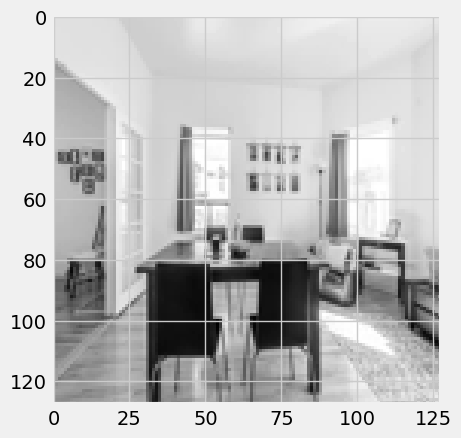

In [ ]:
plt.imshow(x_train_image_gray[0,:,:,0], cmap='gray')

In [ ]:
# Resize image to (128,128,3)
SIZE = 128
x_train_image_rgb = np.array([resize_image(i,128,3) for i in tqdm(data.image)])

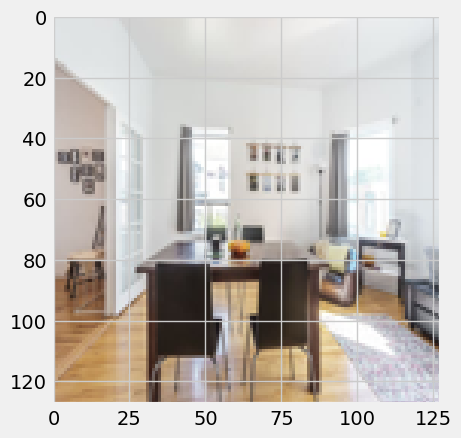

In [ ]:
plt.imshow(x_train_image_rgb[0,:,:,:])

### **Normalization**

In [ ]:
x_train_image_gray = x_train_image_gray / 255.0
x_train_image_rgb = x_train_image_rgb / 255.0

---
<a id = 1></a>
<h1 align="center"><font color = Purple>3. Modeling</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

---

## **3.1 Trail1-Baseline Model**
Build a baseline model, we used a simple feed-forward neural network as our model for both text and image inputs through the following key mechanisms:

- **Separate text and image inputs**: one Input layer for the text data, and one for the image data. This keeps the inputs separate and allows us to process them differently initially.

- **Flattening the image**: apply a Flatten layer to the image input, which "flattens" the 3D tensor into a 1D vector. This prepares the image to be concatenated with the 1D text vector.

- **Concatenation**: concatenate (join) the text and flattened image vectors using Concatenate(). This combines them into a single "fused" embedding that contains information from both the text and image.

- **Shared representations**: The fused embedding is used as input to both the price and type prediction Dense layers. This forces the model to learn shared, joint representations of the text and image that benefit both prediction tasks.This model handles text and image inputs through the following key mechanisms:

- **Separate text and image inputs**: one Input layer for the text data, and one for the image data. This keeps the inputs separate and allows us to process them differently initially.

- **Flattening the image**: apply a Flatten layer to the image input, which "flattens" the 3D tensor into a 1D vector. This prepares the image to be concatenated with the 1D text vector.

- **Concatenation**: concatenate (join) the text and flattened image vectors using Concatenate(). This combines them into a single "fused" embedding that contains information from both the text and image.

- **Shared representations**: The fused embedding is used as input to both the price and type prediction Dense layers. This forces the model to learn shared, joint representations of the text and image that benefit both prediction tasks.

### **Create helper functions**
I will use the same code repeatedly for multiple experimental models, so I defined generalized functions to avoid rewriting that repeated logic.

In [ ]:
# define model input/output using keys.
def DefineModel(image_input,text_input,out_price,out_type):

    """
    Define a Keras model by specifying its inputs and outputs using keys.

    Args:
    ----
    out_price (str): The price categories (bignner, plus, or premium).
    out_type (str): The type output for the model.

    Returns:
    -------
    Model: A Keras model with the given inputs and outputs.
    """

    model = keras.Model(
        inputs={
            'summary': text_input,
            'image': image_input,
        },
        outputs={
            'price': out_price,
            'type': out_type,
        },
    )
    return model

In [ ]:
# compile model with optimizer, loss values for each task, loss
# weights for each task.
def CompileModel(model,optimizer):

    if optimizer == 'adam':
        opt = Adam()
    elif optimizer == 'rmsprop':
        opt = RMSprop()
    elif optimizer == 'sgd':
        opt = SGD()

    model.compile(
        optimizer=opt,

        loss={'price': 'sparse_categorical_crossentropy',
              'type': 'sparse_categorical_crossentropy',},

        loss_weights={'price': 0.5,'type': 0.5},

        metrics={
            'price': ['SparseCategoricalAccuracy'],
            'type': ['SparseCategoricalAccuracy'],},
    )

In [ ]:
def plot_model_history(history, epoch):
    """
    Plot the training and validation loss and accuracy of a deep learning classification model using Plotly.

    Parameters:
    ----------
    history (keras.callbacks.History): The history object returned by Keras during training.
    epoch (Numpy array): numpy array for epochs range (e.g., [0,1,2,...9]).

    Returns:
    --------
    None
    """
    # Create a Plotly figure
    fig1 = go.Figure()
    fig2 = go.Figure()
    # Add the training and validation loss traces
    fig1.add_trace(go.Scatter(x=epoch, y=history['loss'], mode='lines', name='Training Loss'))
    fig1.add_trace(go.Scatter(x=epoch, y=history['val_loss'], mode='lines', name='Validation Loss'))

    # Add the training and validation accuracy traces
    fig2.add_trace(go.Scatter(x=epoch, y=history['price_sparse_categorical_accuracy'], mode='lines', name='Price Training Accuracy'))
    fig2.add_trace(go.Scatter(x=epoch, y=history['val_price_sparse_categorical_accuracy'], mode='lines', name='Price Validation Accuracy'))

    # Set the axis labels and title
    fig1.update_layout(width=1000,height = 700, xaxis_title='Epochs', yaxis_title='Loss',title='Loss Model History')
    fig2.update_layout(width=1000,height = 700, xaxis_title='Epochs', yaxis_title='Accuracy',title='Accuracy Model History')

    # Show the figure
    fig1.show()
    fig2.show()

In [ ]:
"""
Define input shapes. We have two inputs.
one for image and the other for text.
"""
text_input_shape = (None, max_len)
gray_image_input_shape = (None, 128, 128, 2)
rgb_image_input_shape = (None, 128, 128, 3)

### **Build Baseline model**

In [ ]:
# 1. Text part - define text input layer
text_input  = keras.Input(batch_shape = text_input_shape, name = 'text_input')

# 2. Image part - define image input layer then flatten image input
image_input_gray = keras.Input(batch_shape=gray_image_input_shape , name = 'image_input')
flatten_image = Flatten()(image_input_gray)

# 3. fusion - concatenate text and image inputs.
fused = Concatenate()([text_input, flatten_image])

# 4.  multi-task learning - define output layer, one dense layer for each task
out_price = Dense(len_price, activation = 'softmax',name='price')(fused)
out_type = Dense(len_type, activation = 'softmax',name='type')(fused)

In [ ]:
model1 = DefineModel(image_input_gray,text_input,out_price,out_type)
CompileModel(model1,'adam')
model1.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image_input (InputLayer)       [(None, 128, 128, 2  0           []                               
                                )]                                                                
                                                                                                  
 text_input (InputLayer)        [(None, 100)]        0           []                               
                                                                                                  
 flatten_5 (Flatten)            (None, 32768)        0           ['image_input[0][0]']            
                                                                                                  
 concatenate_4 (Concatenate)    (None, 32868)        0           ['text_input[0][0]',       

In [ ]:
%%time
n_epochs = 40
n_batchs = 16

es = EarlyStopping(monitor='val_price_loss', patience=10, )
cp = ModelCheckpoint(f"trail1_model.hdf5", save_best_only=True)

history1 = model1.fit(
                    x = {'summary': x_train_text_id,
                         'image': x_train_image_gray},

                    y = {'price': y_train_price.astype('int64'),
                         'type': y_train_type.astype('int64')},

                    epochs = n_epochs,
                    batch_size = n_batchs,
                    validation_split = 0.2,
                    callbacks=[es,cp],
                    verbose = 1,)

Epoch 1/40
367/367 [==============================] - 4s 11ms/step - loss: 7484.3604 - price_loss: 7412.8008 - type_loss: 7555.9297 - price_sparse_categorical_accuracy: 0.5119 - type_sparse_categorical_accuracy: 0.5761 - val_loss: 11498.1094 - val_price_loss: 9099.7793 - val_type_loss: 13896.4365 - val_price_sparse_categorical_accuracy: 0.4870 - val_type_sparse_categorical_accuracy: 0.5273
Epoch 2/40
367/367 [==============================] - 4s 10ms/step - loss: 7225.4121 - price_loss: 7100.3633 - type_loss: 7350.4648 - price_sparse_categorical_accuracy: 0.5089 - type_sparse_categorical_accuracy: 0.5744 - val_loss: 11203.4707 - val_price_loss: 8750.6914 - val_type_loss: 13656.2520 - val_price_sparse_categorical_accuracy: 0.4843 - val_type_sparse_categorical_accuracy: 0.5293
Epoch 3/40
367/367 [==============================] - 4s 11ms/step - loss: 6970.8931 - price_loss: 6791.6655 - type_loss: 7150.1221 - price_sparse_categorical_accuracy: 0.5106 - type_sparse_categorical_accuracy: 0.

In [ ]:
np.array(n_epochs)

array(40)

In [ ]:
plot_model_history(history1.history, np.arange(n_epochs))

> **OBSERVATION:** The baseline model is typically a simple model that serves as a starting point for more complex models. It is used to establish a baseline level of performance for the task at hand. In this case, the baseline model achieved an accuracy of **60.733%**, which means that any subsequent models that are developed would need to perform better than this score to be considered an improvement.

## **3.2 Trail2 - Embedding + SimpleRNN + Simple CNN**
Used average of embedding for text with CNN for images

### **Build Model2**

In [ ]:
embedding_dim=128

# 1. Text part - define text input layer
embedding_layer = Embedding(vocab_size, embedding_dim)(text_input)
reshaped_input = Reshape((max_len, embedding_dim))(embedding_layer)
rnn = SimpleRNN(64)(reshaped_input)
rnn_reshaped = Reshape((-1, 64))(rnn)
averaged = tf.reduce_mean(rnn_reshaped, axis=1)

# 2. Image part - define image input layer then flatten image input
conv_layer = Conv2D(64, (3,3), activation='relu')(image_input_gray)
pool_layer = MaxPooling2D((3, 3))(conv_layer)
flatten_layer = Flatten()(conv_layer)

# 3. fusion - concatenate text and image inputs.
fused =  Concatenate()([averaged, flatten_layer])

# 4.  multi-task learning - define output layer, one dense layer for each task
out_price = Dense(len_price, activation='softmax', name='price')(fused)
out_type = Dense(len_type, activation='softmax', name='type')(fused)

In [ ]:
model2 = DefineModel(image_input_gray,text_input,out_price,out_type)
CompileModel(model2,'adam')
model2.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None, 100)]        0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, 100, 128)     5120000     ['text_input[0][0]']             
                                                                                                  
 reshape_11 (Reshape)           (None, 100, 128)     0           ['embedding_10[0][0]']           
                                                                                                  
 simple_rnn_10 (SimpleRNN)      (None, 64)           12352       ['reshape_11[0][0]']             
                                                                                            

### **Train Model2**

In [ ]:
# i exectued this cell twice , once using 20 epochs and the other using 2 epochs
%%time
n_epochs = 20
n_batchs = 64

es = EarlyStopping(monitor='val_price_loss', patience=5, )
cp = ModelCheckpoint(f"trail2_model.hdf5", save_best_only=True)

history2 = model2.fit(
                    x = {'summary': x_train_text_id,
                         'image': x_train_image_gray},

                    y = {'price': y_train_price.astype('int64'),
                         'type': y_train_type.astype('int64')},

                    epochs = n_epochs,
                    batch_size = n_batchs,
                    validation_split = 0.2,
                    callbacks=[es,cp],
                    verbose = 1,)

Epoch 1/2
92/92 [==============================] - 137s 1s/step - loss: 0.9247 - price_loss: 0.8367 - type_loss: 1.0127 - price_sparse_categorical_accuracy: 0.6198 - type_sparse_categorical_accuracy: 0.7565 - val_loss: 0.8951 - val_price_loss: 0.8287 - val_type_loss: 0.9615 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/2
92/92 [==============================] - 134s 1s/step - loss: 0.9213 - price_loss: 0.8348 - type_loss: 1.0078 - price_sparse_categorical_accuracy: 0.6200 - type_sparse_categorical_accuracy: 0.7565 - val_loss: 0.8972 - val_price_loss: 0.8284 - val_type_loss: 0.9660 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
CPU times: user 9min 47s, sys: 5min 19s, total: 15min 7s
Wall time: 5min 23s


In [ ]:
plot_model_history(history2.history, np.arange(n_epochs))

> **OBSERVATION:**
- **Training Performance**: The model seems to be performing well on the training set, with a low overall loss and high accuracy for both price and type predictions.
    - loss: 0.9247
    - price_loss: 0.8367
    - type_loss: 1.0127
    - price_sparse_categorical_accuracy: 0.6198
    - type_sparse_categorical_accuracy: 0.7565
- **Validation Performance**: the model is not performing as well on the validation set. The overall loss is much higher, and the accuracy for both price and type predictions is much lower than on the training set.
    - val_loss: 0.8951
    - val_price_loss: 0.828
    - val_type_loss: 0.9615
    - val_price_sparse_categorical_accuracy: 0.6241
    - val_type_sparse_categorical_accuracy: 0.7688

- **leaderboard Performance** = 0.61195

> **IMPROVEMWNT:**

* Model2 generalize well, but its accuracy is unsatisfactory.

## **3.3 Trail3 - Embedding + LSTM + CNN**
Used LSTM for text with CNN for images

### **Build Model3**

In [ ]:
# 1. Text part - define text input layer
embedding_layer = Embedding(vocab_size, embedding_dim)(text_input)
lstm1 = LSTM(128 , recurrent_dropout = 0.2 , dropout = 0.2)(embedding_layer)
lstm1_reshaped = Reshape((-1, 128))(lstm1)
lstm2 = LSTM(64 , recurrent_dropout = 0.2 , dropout = 0.2)(lstm1_reshaped)
lstm2_reshaped = Reshape((-1, 64))(lstm2)
averaged = tf.reduce_mean(lstm2_reshaped, axis=1)

# 2. Image part - define image input layer then flatten image input
conv1 = Conv2D(32, (3,3), activation='relu')(image_input_gray)
pool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3,3), activation='relu')(pool1)
pool2 = MaxPooling2D((2, 2))(conv_layer)
conv3 = Conv2D(128, (3,3), activation='relu')(pool2)
flattened = Flatten()(conv3)

# 3. fusion - concatenate text and image inputs.
fc =  Concatenate()([averaged, flattened])
fused = Dropout(0.2)(fc)

# 4.  multi-task learning - define output layer, one dense layer for each task
out_price = Dense(len_price, activation='softmax', name='price')(fused)
out_type = Dense(len_type, activation='softmax', name='type')(fused)

In [ ]:
model3 = DefineModel(image_input_gray,text_input,out_price,out_type)
CompileModel(model3)
model3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None, 100)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 100, 128)     5120000     ['text_input[0][0]']             
                                                                                                  
 lstm (LSTM)                    (None, 128)          131584      ['embedding_2[0][0]']            
                                                                                                  
 image_input (InputLayer)       [(None, 128, 128, 2  0           []                               
                                )]                                                          

### **Train Model3**

In [ ]:
%%time
n_epochs = 20
n_batchs = 32

es = EarlyStopping(monitor='val_price_loss', patience=5, )
cp = ModelCheckpoint(f"trail3_model.hdf5", save_best_only=True)

history3 = model3.fit(
                    x = {'summary': x_train_text_id,
                         'image': x_train_image_gray},

                    y = {'price': y_train_price.astype('int64'),
                         'type': y_train_type.astype('int64')},

                    epochs = n_epochs,
                    batch_size = n_batchs,
                    validation_split = 0.2,
                    callbacks=[es,cp],
                    verbose = 1,)

Epoch 1/20
184/184 [==============================] - 291s 2s/step - loss: 0.9573 - price_loss: 0.8435 - type_loss: 1.0712 - price_sparse_categorical_accuracy: 0.6121 - type_sparse_categorical_accuracy: 0.7524 - val_loss: 0.8844 - val_price_loss: 0.8096 - val_type_loss: 0.9593 - val_price_sparse_categorical_accuracy: 0.6105 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/20
184/184 [==============================] - 288s 2s/step - loss: 0.8172 - price_loss: 0.7667 - type_loss: 0.8677 - price_sparse_categorical_accuracy: 0.6555 - type_sparse_categorical_accuracy: 0.7621 - val_loss: 0.9093 - val_price_loss: 0.8244 - val_type_loss: 0.9942 - val_price_sparse_categorical_accuracy: 0.6187 - val_type_sparse_categorical_accuracy: 0.7715
Epoch 3/20
184/184 [==============================] - 284s 2s/step - loss: 0.4514 - price_loss: 0.5116 - type_loss: 0.3911 - price_sparse_categorical_accuracy: 0.7904 - type_sparse_categorical_accuracy: 0.8664 - val_loss: 1.1158 - val_price_loss: 1.0285 

In [ ]:
plot_model_history(history3.history, np.arange(n_epochs))

> **OBSERVATION:**
- Training Performance: The model seems to be performing well on the training set, with a low overall loss and high accuracy for both price and type predictions.
    - loss: 0.0682
    - price_loss: 0.0875
    - type_loss: 0.0488
    - price_sparse_categorical_accuracy: 0.9904
    - type_sparse_categorical_accuracy: 0.9957
- Validation Performance: the model is not performing as well on the validation set. The overall loss is much higher, and the accuracy for both price and type predictions is much lower than on the training set.
    - val_loss: 1.8111
    - val_price_loss: 1.5233
    - val_type_loss: 2.0989
    - val_price_sparse_categorical_accuracy: 0.5696
    - val_type_sparse_categorical_accuracy: 0.7667

- leaderboard = 0.62907

> **IMPROVEMWNT:**

*  Model3 is suffering from overfit, I will try to use the same layers with GRU, to know the diffrence in results.

## **3.4 Trail4 - Embedding + GRU + CNN**
Used GRU for text with CNN for images

### **Build Model4**

In [ ]:
# 1. Text part - define text input layer
embedding_layer = Embedding(vocab_size, embedding_dim)(text_input)
gru1 = GRU(128 , recurrent_dropout = 0.2 , dropout = 0.2)(embedding_layer)
gru1_reshaped = Reshape((-1, 128))(gru1)
gru2 = GRU(64 , recurrent_dropout = 0.2 , dropout = 0.2)(gru1_reshaped)
gru2_reshaped = Reshape((-1, 64))(gru2)
averaged = tf.reduce_mean(gru2_reshaped, axis=1)

# 2. Image part - define image input layer then flatten image input
conv1 = Conv2D(32, (3,3), activation='relu')(image_input_gray)
pool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3,3), activation='relu')(pool1)
pool2 = MaxPooling2D((2, 2))(conv_layer)
conv3 = Conv2D(128, (3,3), activation='relu')(pool2)
flattened = Flatten()(conv3)

# 3. fusion - concatenate text and image inputs.
fc =  Concatenate()([averaged, flattened])
fused = Dropout(0.2)(fc)

# 4.  multi-task learning - define output layer, one dense layer for each task
out_price = Dense(len_price, activation='softmax', name='price')(fused)
out_type = Dense(len_type, activation='softmax', name='type')(fused)

In [ ]:
model4 = DefineModel(image_input_gray,text_input,out_price,out_type)
CompileModel(model4)
model4.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None, 100)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 100, 128)     5120000     ['text_input[0][0]']             
                                                                                                  
 gru (GRU)                      (None, 128)          99072       ['embedding_3[0][0]']            
                                                                                                  
 image_input (InputLayer)       [(None, 128, 128, 2  0           []                               
                                )]                                                          

### **Train Model4**

In [ ]:
%%time
n_epochs = 20
n_batchs = 32

es = EarlyStopping(monitor='val_price_loss', patience=5, )
cp = ModelCheckpoint(f"trail4_model.hdf5", save_best_only=True)

history4 = model4.fit(
                    x = {'summary': x_train_text_id,
                         'image': x_train_image_gray},

                    y = {'price': y_train_price.astype('int64'),
                         'type': y_train_type.astype('int64')},

                    epochs = n_epochs,
                    batch_size = n_batchs,
                    validation_split = 0.2,
                    callbacks=[es,cp],
                    verbose = 1,)

Epoch 1/20
184/184 [==============================] - 303s 2s/step - loss: 0.9520 - price_loss: 0.8416 - type_loss: 1.0625 - price_sparse_categorical_accuracy: 0.6133 - type_sparse_categorical_accuracy: 0.7529 - val_loss: 0.9177 - val_price_loss: 0.8125 - val_type_loss: 1.0229 - val_price_sparse_categorical_accuracy: 0.6146 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/20
184/184 [==============================] - 287s 2s/step - loss: 0.7671 - price_loss: 0.7285 - type_loss: 0.8056 - price_sparse_categorical_accuracy: 0.6730 - type_sparse_categorical_accuracy: 0.7667 - val_loss: 0.9160 - val_price_loss: 0.8446 - val_type_loss: 0.9873 - val_price_sparse_categorical_accuracy: 0.6071 - val_type_sparse_categorical_accuracy: 0.7735
Epoch 3/20
184/184 [==============================] - 292s 2s/step - loss: 0.3492 - price_loss: 0.4256 - type_loss: 0.2729 - price_sparse_categorical_accuracy: 0.8377 - type_sparse_categorical_accuracy: 0.9080 - val_loss: 1.1368 - val_price_loss: 1.0325 

In [ ]:
plot_model_history(history4.history, np.arange(n_epochs))

> **OBSERVATION:**
- Training Performance: The model seems to be performing well on the training set, with a low overall loss and high accuracy for both price and type predictions.
    - loss: 0.0556
    - price_loss: 0.0688
    - type_loss: 0.0425
    - price_sparse_categorical_accuracy: 0.9928
    - type_sparse_categorical_accuracy: 0.9961
- Validation Performance: the model is not performing as well on the validation set. The overall loss is much higher, and the accuracy for both price and type predictions is much lower than on the training set.
    - val_loss: 1.6554
    - val_price_loss: 1.4426
    - val_type_loss: 1.8681
    - val_price_sparse_categorical_accuracy: 0.5723
    - val_type_sparse_categorical_accuracy: 0.7640

- leaderboard = 0.62744

## **3.5 Trail5 - Embedding + Bidirectional GRU + CNN**
Used GRU for text with CNN for images

### **Build Model5**

In [ ]:
# 1. Text part - define text input layer
embedding_layer = Embedding(vocab_size, embedding_dim)(text_input)
gru1 = Bidirectional(GRU(128 , recurrent_dropout = 0.2 , dropout = 0.2, trainable=True))(embedding_layer)
gru1_reshaped = Reshape((-1, 128*2))(gru1)
gru2 = Bidirectional(GRU(64 , recurrent_dropout = 0.2 , dropout = 0.2))(gru1_reshaped)
txt_fc = Dense(256, activation='relu')(gru2)

# 2. Image part - define image input layer then flatten image input
conv1 = Conv2D(32, (3,3), activation='relu')(image_input_gray)
pool1 = MaxPooling2D((2, 2))(conv1)
drop1= Dropout(0.2)(pool1)
conv2 = Conv2D(64, (3,3), activation='relu')(drop1)
pool2 = MaxPooling2D((2, 2))(conv_layer)
drop2= Dropout(0.2)(pool2)
conv3 = Conv2D(128, (3,3), activation='relu')(drop2)
flattened = Flatten()(conv3)
img_fc = Dense(256, activation='relu')(flattened)

# 3. fusion - concatenate text and image inputs.
fc =  Concatenate()([txt_fc, img_fc])

# 4.  multi-task learning - define output layer, one dense layer for each task
out_price = Dense(len_price, activation='softmax', name='price')(fused)
out_type = Dense(len_type, activation='softmax', name='type')(fused)

In [ ]:
model5 = DefineModel(image_input_gray,text_input,out_price,out_type)
CompileModel(model5)
model5.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None, 100)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 100, 128)     5120000     ['text_input[0][0]']             
                                                                                                  
 gru (GRU)                      (None, 128)          99072       ['embedding_3[0][0]']            
                                                                                                  
 image_input (InputLayer)       [(None, 128, 128, 2  0           []                               
                                )]                                                          

### **Train Model5**

In [ ]:
%%time
n_epochs = 20
n_batchs = 32

es = EarlyStopping(monitor='val_price_loss', patience=5, )
cp = ModelCheckpoint(f"trail5_model.hdf5", save_best_only=True)

# Train model with data augmentation
history5 = model5.fit(
                    x = {'summary': x_train_text_id,
                         'image': x_train_image_gray},

                    y = {'price': y_train_price.astype('int64'),
                         'type': y_train_type.astype('int64')},

                    epochs = n_epochs,
                    batch_size = n_batchs,
                    validation_split = 0.2,
                    callbacks=[es,cp],
                    verbose = 2,)

Epoch 1/20
184/184 - 301s - loss: 0.9652 - price_loss: 0.8527 - type_loss: 1.0776 - price_sparse_categorical_accuracy: 0.6058 - type_sparse_categorical_accuracy: 0.7526 - val_loss: 0.8869 - val_price_loss: 0.8038 - val_type_loss: 0.9700 - val_price_sparse_categorical_accuracy: 0.6214 - val_type_sparse_categorical_accuracy: 0.7715 - 301s/epoch - 2s/step
Epoch 2/20
184/184 - 281s - loss: 0.5966 - price_loss: 0.5912 - type_loss: 0.6020 - price_sparse_categorical_accuracy: 0.7580 - type_sparse_categorical_accuracy: 0.8020 - val_loss: 0.9891 - val_price_loss: 0.8795 - val_type_loss: 1.0987 - val_price_sparse_categorical_accuracy: 0.5812 - val_type_sparse_categorical_accuracy: 0.7735 - 281s/epoch - 2s/step
Epoch 3/20
184/184 - 279s - loss: 0.1763 - price_loss: 0.2386 - type_loss: 0.1140 - price_sparse_categorical_accuracy: 0.9319 - type_sparse_categorical_accuracy: 0.9725 - val_loss: 1.3220 - val_price_loss: 1.1129 - val_type_loss: 1.5311 - val_price_sparse_categorical_accuracy: 0.5900 - val

In [ ]:
plot_model_history(history5.history, np.arange(n_epochs))

> **OBSERVATION:**
- Training Performance: The model seems to be performing well on the training set, with a low overall loss and high accuracy for both price and type predictions.
    - loss: 0.1763
    - price_loss: 0.2386
    - type_loss: 0.1140
    - price_sparse_categorical_accuracy: 0.9319
    - type_sparse_categorical_accuracy: 0.9725
- Validation Performance: the model is not performing as well on the validation set. The overall loss is much higher, and the accuracy for both price and type predictions is much lower than on the training set.
    - val_loss: 1.3220
    - val_price_loss: 1.1129
    - val_type_loss: 1.5311
    - val_price_sparse_categorical_accuracy: 0.5900
    - val_type_sparse_categorical_accuracy: 0.7660

- leaderboard = 0.06739

## **3.6 Trail6 - Embedding + Pretrained-GRU + CNN**
Used GRU for text with CNN for images

### **Build Model6**

In [ ]:
# 1. Text part - define text input layer
embedding_layer = Embedding(vocab_size, embedding_dim)(text_input)
gru1 = GRU(128 , recurrent_dropout = 0.2 , dropout = 0.2, return_sequences=True, trainable=False)(embedding_layer)
gru2 = GRU(64 , recurrent_dropout = 0.2 , dropout = 0.2, return_sequences=True)(Reshape((-1, 128))(gru1))
averaged = tf.reduce_mean(gru2, axis=1)

# 2. Image part - define image input layer then flatten image input
conv1 = Conv2D(32, (3,3), activation='relu')(image_input_gray)
pool1 = MaxPooling2D((2, 2))(conv1)
conv2 = Conv2D(64, (3,3), activation='relu')(pool1)
pool2 = MaxPooling2D((2, 2))(conv2)
conv3 = Conv2D(128, (3,3), activation='relu')(pool2)
flattened = Flatten()(conv3)
drop= Dropout(0.2)(flattened)
img_fc = Dense(256, activation='relu')(flattened)

# 3. fusion - concatenate text and image inputs.
fc =  Concatenate()([averaged, img_fc])
# fused = Dropout(0.2)(fc)

# 4.  multi-task learning - define output layer, one dense layer for each task
out_price = Dense(len_price, activation='softmax', name='price')(fused)
out_type = Dense(len_type, activation='softmax', name='type')(fused)

In [ ]:
model6 = DefineModel(image_input_gray,text_input,out_price,out_type)
CompileModel(model6,'adam')
model6.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None, 100)]        0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, 100, 128)     5120000     ['text_input[0][0]']             
                                                                                                  
 reshape_11 (Reshape)           (None, 100, 128)     0           ['embedding_10[0][0]']           
                                                                                                  
 simple_rnn_10 (SimpleRNN)      (None, 64)           12352       ['reshape_11[0][0]']             
                                                                                           

### **Train Model6**

In [ ]:
%%time
n_epochs = 1
n_batchs = 32

es = EarlyStopping(monitor='val_price_loss', patience=5, )
cp = ModelCheckpoint(f"trail6_model.hdf5", save_best_only=True)

# Train model with data augmentation
history6 = model6.fit(
                    x = {'summary': x_train_text_id,
                         'image': x_train_image_gray},

                    y = {'price': y_train_price.astype('int64'),
                         'type': y_train_type.astype('int64')},

                    epochs = n_epochs,
                    batch_size = n_batchs,
                    validation_split = 0.2,
                    callbacks=[es,cp],
                    verbose = 2,)

> **OBSERVATION:** leaderboard accuracy is 0.57110

---
<a id = 1></a>
<h1 align="center"><font color = Purple>4. Prediction</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

---

## **4.1 Preprocessing test dataset**

In [ ]:
test_data = pd.read_csv('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/test_x.csv')
test_data

,id,summary,image
0,0,Charming warm house is ready to host you here in multi cultural Parc Ex. Short walk to Parc Jar...,img_test/0.jpg
1,1,"La chambre est spacieuse et lumineuse, dans un appartement partagée avec trois autres colocataires.",img_test/1.jpg
2,2,Grande chambre confortable située au sous-sol de notre maison. Une grande salle de bain avec dou...,img_test/2.jpg
3,3,"Près d’un Métro, ligne orange. 10 minutes à pied. Quartier résidentiel Ahuntsic de Montréal. Cen...",img_test/3.jpg
4,4,Very bright appartment and very cosy. 2 separate bedrooms (1 with a queen size and the other wit...,img_test/4.jpg
...,...,...,...
7355,7626,"Large, fully-furnished flat with brick walls and 1900 hardwood floor. Ideal for group or family ...",img_test/7627.jpg
7356,7627,Logement situé dans le haut d’un duplex. Vivez le charme de Montréal à proximité de tout. À 5 mi...,img_test/7628.jpg
7357,7628,"My place is close to parks, . My place is good for couples.",img_test/7629.jpg
7358,7629,"*** For security reasons, I will prioritize guests with reviews ! Thank you for understanding! :...",img_test/7630.jpg


In [ ]:
%%time
# translate the different language in summary
from googletrans import Translator

translator = Translator()
test_data['translated_summary'] = [translator.translate(x, dest='en').text for x in test_data['summary']]

CPU times: user 49.2 s, sys: 4.81 s, total: 54 s
Wall time: 7min 58s


In [ ]:
# loading summary: (force convert some of the non-string cell to string)
x_test_text  =  test_data['translated_summary'].astype('str')
x_test_text_id = pad_sequences(tokenizer.texts_to_sequences(x_test_text),maxlen=max_len,padding='post',)
x_test_text_id[0]

array([ 185,  314,  172,    7,  851,    4,  506,   12,  439,    5, 2172,
       1226,  114, 1042,  298,   18,    4,  114,  324,    4, 1386, 3784,
       2173,    2,   21,  473,   57,  378,    4,   14,    2,   19,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [ ]:
x_test_image = np.array([resize_image(i,128,2) for i in tqdm(test_data.image)])

100%|██████████| 7360/7360 [01:33<00:00, 78.92it/s]


In [ ]:
x_test_image = x_test_image/255.0

## **4.2 Predict test dataset**

In [ ]:
from keras.models import load_model
cls1 = load_model('/kaggle/working/trail1_model.hdf5')
cls2 = load_model('/kaggle/working/trail2_model.hdf5')
cls3 = load_model('/kaggle/working/trail3_model.hdf5')
cls4 = load_model('/kaggle/working/trail4_model.hdf5')
cls5 = load_model('/kaggle/working/trail5_model.hdf5')
cls6 = load_model('/kaggle/working/trail6_model.hdf5')

In [ ]:
y_pred1 = cls1.predict({'summary':x_test_text_id,'image': x_test_image})
y_pred2 = cls2.predict({'summary':x_test_text_id,'image': x_test_image})
y_pred3 = cls3.predict({'summary':x_test_text_id,'image': x_test_image})
y_pred4 = cls4.predict({'summary':x_test_text_id,'image': x_test_image})
y_pred5 = cls5.predict({'summary':x_test_text_id,'image': x_test_image})
y_pred6 = cls6.predict({'summary':x_test_text_id,'image': x_test_image})

230/230 [==============================] - 43s 188ms/step


In [ ]:
price_pred1 = np.argmax(y_pred1['price'], axis=1)
price_pred2 = np.argmax(y_pred2['price'], axis=1)
price_pred3 = np.argmax(y_pred3['price'], axis=1)
price_pred4 = np.argmax(y_pred4['price'], axis=1)
price_pred5 = np.argmax(y_pred5['price'], axis=1)
price_pred6 = np.argmax(y_pred6['price'], axis=1)

In [ ]:
pd.DataFrame({'id': test_data.id,'price': price_pred1,}).to_csv(f'model1.csv', index=False)
pd.DataFrame({'id': test_data.id,'price': price_pred1,}).to_csv(f'model2.csv', index=False)
pd.DataFrame({'id': test_data.id,'price': price_pred1,}).to_csv(f'model3.csv', index=False)
pd.DataFrame({'id': test_data.id,'price': price_pred1,}).to_csv(f'model4.csv', index=False)
pd.DataFrame({'id': test_data.id,'price': price_pred1,}).to_csv(f'model5.csv', index=False)
pd.DataFrame({'id': test_data.id,'price': price_pred1,}).to_csv(f'model6.csv', index=False)